See this page: https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from keras.models import Sequential
from keras.optimizers import Adam #the optimizer
from keras.layers import Dense #ordinary dense layer
from keras.layers import Conv2D # the 2D 'convolution' layer
from keras.layers import Flatten 
from keras.layers import Dropout # dropout layers can help prevent overfitting
from keras.layers import LeakyReLU # the activation function
from keras.utils.vis_utils import plot_model
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

sns.set()
sns.set_context('talk')
sns.set_style("darkgrid", {'axes.grid' : False})

Using TensorFlow backend.
/users/PAS0254/osu9790/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/PAS0254/osu9790/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/PAS0254/osu9790/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/PAS0254/osu9790/.local/lib/p

In [2]:
#load the training profiles array from disk (faster)
trainX = np.load('training_profiles/trainX.npy')
print(trainX.shape)

n_profiles = trainX.shape[0]
img_nx = trainX.shape[1]
img_ny = trainX.shape[2]

# size of the latent space
latent_dim = 100

eps_max = 689.72

(3970, 200, 200)


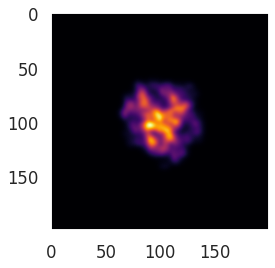

In [3]:
i=np.random.randint(1, high=n_profiles+1, size=1, dtype='l')[0]
plt.imshow(trainX[i], cmap='inferno')
plt.show()

In [4]:
def eps_rescaling_fct(eps_profile, eps_max):
    """Function to rescale the energy density profile to [0,1]"""
    # a linear rescaling
    return eps_profile / eps_max
    # perhaps non-linear rescaling works better
    #return eps_profile / (np.ones_like(eps_profile) + eps_profile)

def inv_eps_rescaling_fct(eps_profile, eps_max):
    """Function to invert rescaling of energy density profile to [0, eps_max]"""
    # a linear rescaling
    return eps_profile * eps_max
    # perhaps non-linear rescaling works better
    #return eps_profile / (np.ones_like(eps_profile) - eps_profile)

In [5]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    """A function to generate n_samples samples of vectors in 
    the latent space of dimension latent_dim."""
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [ ]:
from keras.models import load_model
def predict_profile_gan():
    model = load_model('generators/generator_model_020.h5')
    latent_points = generate_latent_points(latent_dim, 1)
    pred = model.predict(latent_points)[0,:,:,0]
    eps = inv_eps_rescaling_fct(pred, eps_max)
    return eps

In [ ]:
pred_eps = predict_profile_gan()
plt.imshow(pred_eps, cmap='inferno')
plt.tight_layout(True)
plt.show()